# step 1 데이터 구성하기

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [8]:
df = pd.read_csv("체질검사.csv", engine='python')
df

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0


In [9]:
df_y = df['FAT']
df_x = df.drop('FAT', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (176, 13)
train data Y size :  (176,)
test data X size :  (76, 13)
test data Y size :  (76, 13)


# step 2 모델생성

In [12]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("score on training set : ", rf_uncustomized.score(df_train_x,df_train_y))
print("score on test set : ", rf_uncustomized.score(df_test_x,df_test_y))



score on training set :  0.9336861358272488
score on test set :  0.5522614867521729


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 모델설명력 train : 93.36%, test : 55.22%로 모델은 train data에만 과대적합되어있는 것을 알 수 있다. 

# parameter 조정 (n_estimator)

In [17]:
train_score = []
test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(random_state=1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score



In [18]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.934,0.552
1,20,0.945,0.600
2,30,0.951,0.615
3,40,0.954,0.613
4,50,0.954,0.610
5,60,0.956,0.614
6,70,0.955,0.614
7,80,0.955,0.612
8,90,0.956,0.610
9,100,0.956,0.611


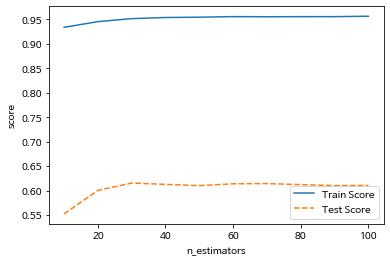

In [19]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()


# parameter 조정 (min_sample_leaf)

In [21]:
train_score = []
test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


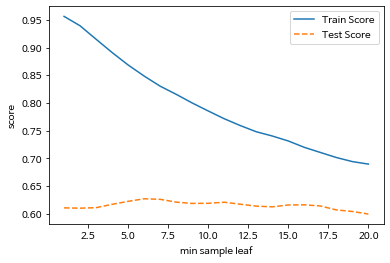

In [22]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()


# parameter 조정 (min_samples_split)

In [23]:
train_score = []
test_score = []
para_split = [n_split * 2 for n_split in range(2,21)]
for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


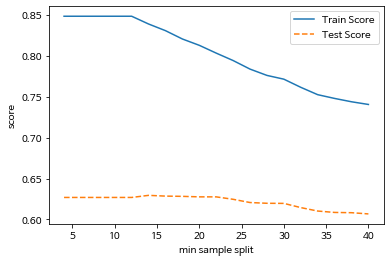

In [25]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()

In [26]:
train_score = []
test_score = []
para_depth = [depth for depth in range(1,20)]
for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_samples_split=14\
                               , max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


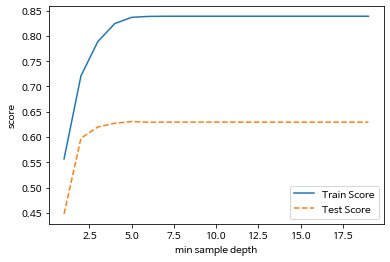

In [28]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min sample depth")
plt.legend()

# Step3 결론도출

In [29]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_samples_split=14\
                               , max_depth=4)
rf_final.fit(df_train_x, df_train_y)
print("score on training set : ", rf_final.score(df_train_x,df_train_y))
print("score on test set : ", rf_final.score(df_test_x,df_test_y))


score on training set :  0.8245945310440618
score on test set :  0.6272281414182838


## train : 82.4%, test : 62.7%로 많이 과대적합이 많이 잡힌것을 알 수있음

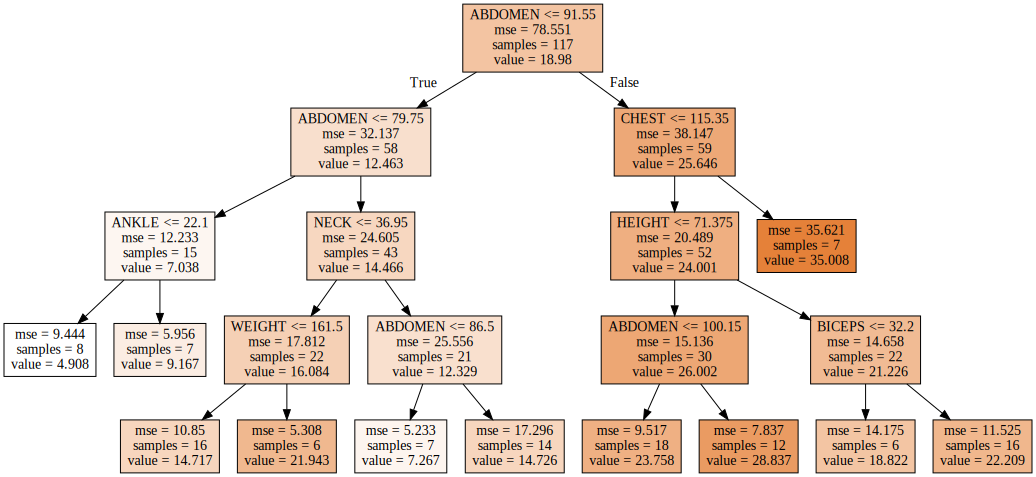

In [30]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names = v_feature_name, impurity=True, filled=True)

with open("rfr_final_0.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

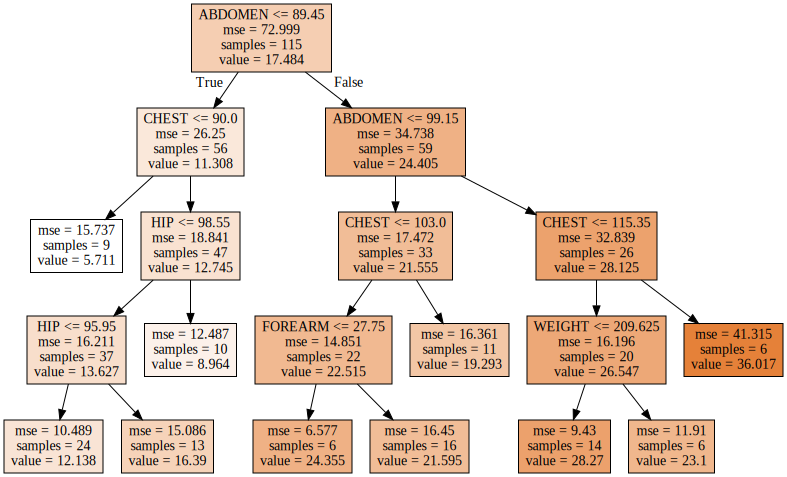

In [31]:
export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", feature_names = v_feature_name, impurity=True, filled=True)

with open("rfr_final_1.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

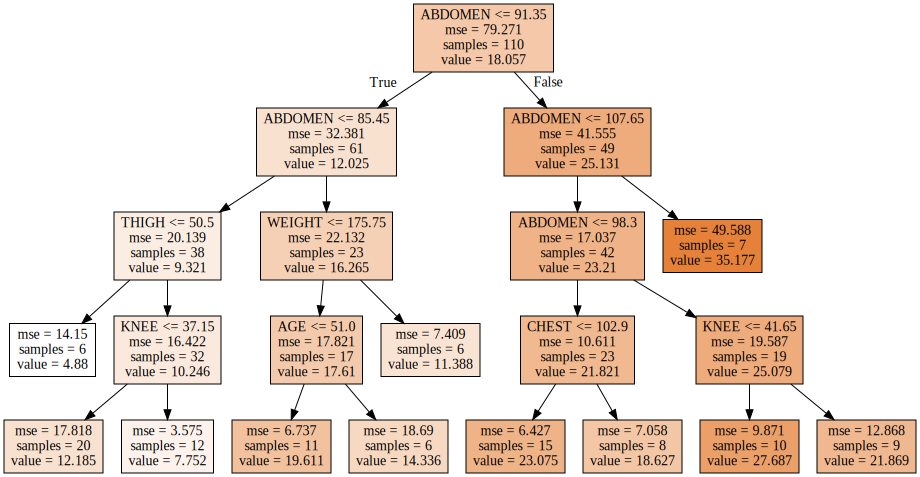

In [32]:
export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot", feature_names = v_feature_name, impurity=True, filled=True)

with open("rfr_final_10.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [33]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

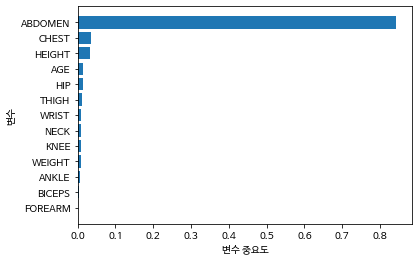

In [34]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [35]:
estimator = RandomForestRegressor()
param_grid = {"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best model : ", grid_dt.best_estimator_)
print("best parameter: ", grid_dt.best_params_)
print("best score : ", grid_dt.best_score_.round(3))




/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best model :  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
best parameter:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 8}
best score :  0.697


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
